In [6]:
from google.colab import files
import pandas as pd

# Favor carregar o arquivo CSV para o Colab
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
iris = pd.read_csv(file_name)


Saving iris (1).csv to iris (1) (2).csv


In [21]:
# Examina as primeiras linhas do conjunto de dados
print(iris.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [14]:
# Dividindo o conjunto de dados em recursos (X) e rótulos (y)
X = iris.drop("Species", axis=1)
y = iris["Species"]

In [15]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [16]:
def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        distance = euclidean_distance(x_test, X_train.iloc[i])
        distances.append((distance, y_train.iloc[i]))

    distances.sort()  # Classificando distâncias
    neighbors = distances[:k]  # seleção dos k vizinhos mais próximos

    # Contagem de votos para cada classe
    votes = {}
    for neighbor in neighbors:
        label = neighbor[1]
        votes[label] = votes.get(label, 0) + 1

    # Retorna a classe com mais votos
    return max(votes, key=votes.get)


In [17]:
from sklearn.model_selection import train_test_split

# Divida o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Teste do KNN para uma amostra de teste
sample_test = X_test.iloc[0]
predicted_class = k_nearest_neighbors(X_train, y_train, sample_test, k=3)

print(f"Para a amostra de teste, a classe prevista é: {predicted_class}")


Para a amostra de teste, a classe prevista é: Iris-versicolor


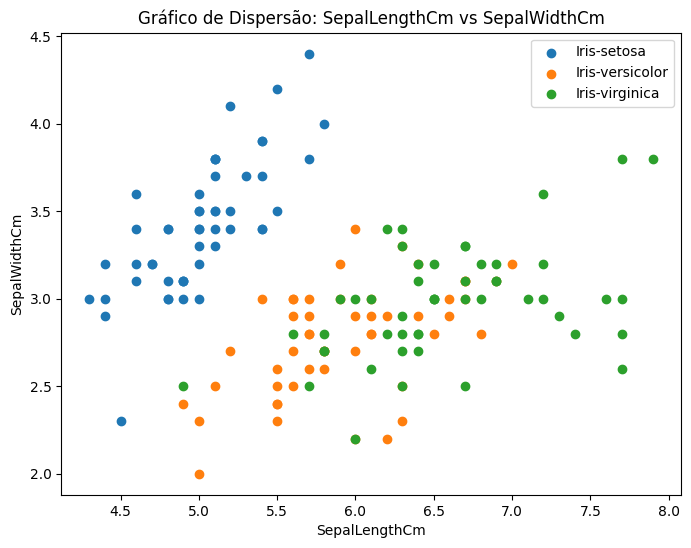

In [20]:
import matplotlib.pyplot as plt

# Escolha duas características para o gráfico de dispersão
feature1 = "SepalLengthCm"
feature2 = "SepalWidthCm"

# Plotagem do gráfico de dispersão
plt.figure(figsize=(8, 6))

# Plotagem das classes
for species in iris["Species"].unique():
    subset = iris[iris["Species"] == species]
    plt.scatter(subset[feature1], subset[feature2], label=species)

# Configurações do gráfico
plt.title(f"Gráfico de Dispersão: {feature1} vs {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()


Este código foi desenvolvido para realizar o carregamento de um conjunto de dados no ambiente do Google Colab.
Utilizando a biblioteca 'files', permitimos o upload de arquivos. O senhor pode carregar o arquivo CSV clicando no botão gerado pela função 'files.upload()'.
O código obtém o nome do arquivo carregado usando 'list(uploaded.keys())[0]' e, em seguida, utiliza a biblioteca Pandas para criar um DataFrame a partir do arquivo CSV.
O DataFrame resultante, chamado 'iris', contém os dados do conjunto de dados e está pronto para ser explorado e analisado utilizando as ferramentas do Pandas.

